    Copyright(c) 2022-
    Author: Chaitanya Tejaswi (github.com/CRTejaswi)    License: GPLv3.0+

# MicroMagnetic Simulation: External Fields

__Constant, Spatially-Variable, Time-Variable Fields__

- A constant field, $\vec{H} = \hat{i} + \hat{j} + \hat{k}$ can be specified by:
    ```
    H = (1,1,1)
    m=df.Field(mesh, dim=3, value=H, norm=Ms)
    ```
- A spatially-varying field, $\vec{H}$ can be specified by a function:
    ```
    def H(point):
        x,y,z = point
        if y > 0:
            return (1,0,0)
        else:
            return (-1,1,0)

    m=df.Field(mesh, dim=3, value=H, norm=Ms)
    ```
- A time-varying field, $\vec{H} = \vec{H_{0}}sin(2\pi f(t-t_{0}))$ can be specified by defining the amplitude (vector) $\vec{H_{0}}$ separately, and the sinusoid, in the Zeeman energy term.
    ```
    H = (1,1,1)
    ...
    system.energy = mm.Zeeman(H=H, wave='sin', f=1e9, t0=1e-9)   # + ... other energies
    ```
    
- Multiple fields can be specified by specifying individual Zeeman terms

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import random
random.seed(1)


# Region
p1,p2 = (-5e-9,-5e-9,-5e-9), (5e-9,5e-9,5e-9)
region = df.Region(p1=p1, p2=p2)
cell = (1e-9, 1e-9, 1e-9)
mesh = df.Mesh(region=region, cell=cell)

# Fields - H1,H2,H3
H1 = (1,1,1)
H1 = df.Field(mesh, dim=3, value=H1)
def H2(point):
    x,y,z = point
    if y > 0:
        return (1,0,0)
    else:
        return (-1,1,0)
H2 = df.Field(mesh, dim=3, value=H2)
H3 = H1
    
# Energies: zeeman only
system = mm.System(name='multifield')
system.energy = (mm.Zeeman(H=H1, name='zeeman1')
                +mm.Zeeman(H=H2, name='zeeman2')
                +mm.Zeeman(H=H3, wave='sin', f=1e9, t0=1e-9, name='zeeman3'))
# Dynamics: precession/damping
gamma0, alpha = 2.211e5, 0.2
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)

# Magnetization
Ms = 8e6
def _m(point):
    # defines magnetization in range [-1,1] for x,y,z directions
    return [2*random.random()-1 for i in range(3)]
system.m = df.Field(mesh,dim=3,value=_m, norm=Ms)

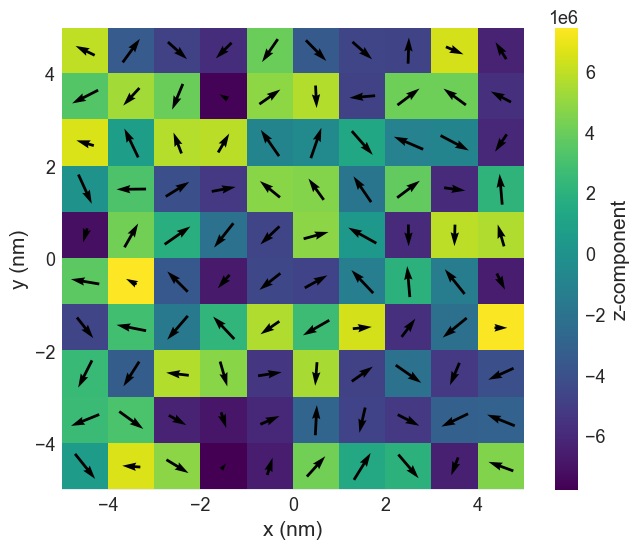

In [2]:
system.m.plane('z').mpl()

In [3]:
system.m.plane('z').k3d.vector(head_size=5)

Output()

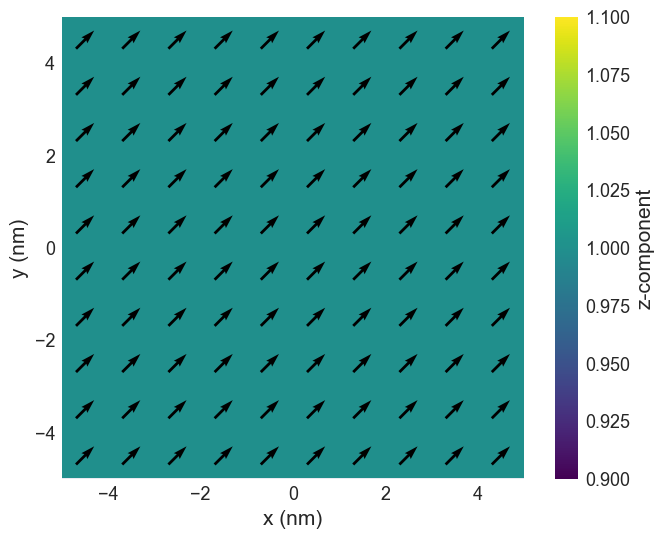

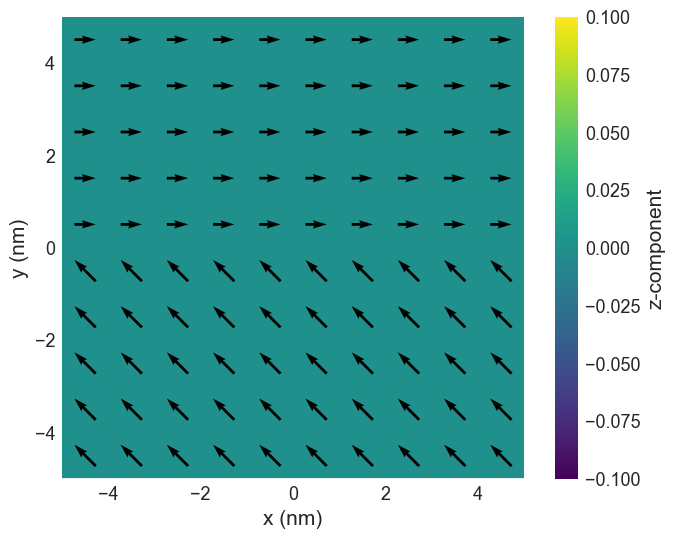

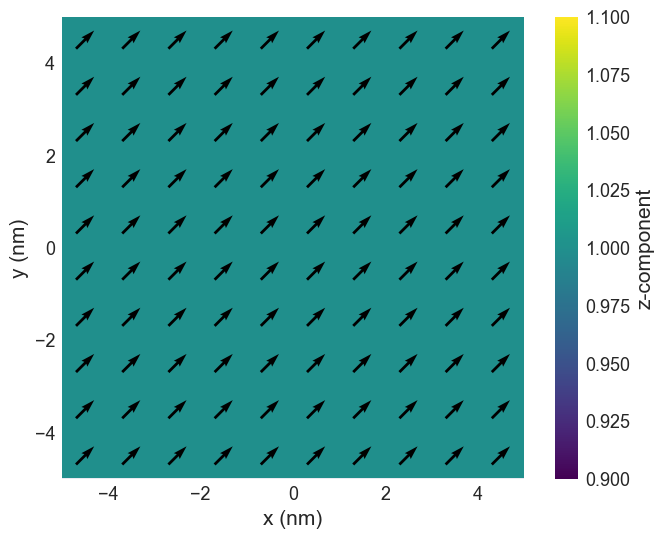

In [4]:
H1.plane('z').mpl()
H2.plane('z').mpl()
H3.plane('z').mpl()